In [1]:
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.model_selection import cross_val_score
import scipy
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.ensemble import VotingClassifier

import random
from sklearn.preprocessing import StandardScaler
%matplotlib inline

/Users/luisbanderas/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/luisbanderas/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
text=""
nLines=0
nAttributes=0
nClasses=0
attributesName = []
data = []
dataPerAttribute = []
classes = []
classesName = ["Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6", "Clase 7"]
fileName = input("Nombre del archivo que deseas abrir: ")

dataFrame = []
x = []
y = []

try:
    with open(fileName + ".txt","r") as file:
        count=0
        for line in file:
            if count < 3:
                if count == 0:
                    nLines = int(line.strip())
                else:
                    if count == 1:
                        nAttributes = int(line.strip())
                        for i in range(1,nAttributes+1):
                            attributesName.append("att"+str(i))
                            dataPerAttribute.append([])
                    else:
                        if count == 2:
                            nClasses = int(line.strip())
            else:
                split_string_S = line.strip().split(',')
                
                count_split = 0
                split_string_n = []
                for split in split_string_S:
                    if count_split >= nAttributes:
                        split_string_n.append(int(split))
                    else:
                        split_string_n.append(float(split))
                    count_split += 1
                data.append(split_string_n)
                classes.append(split_string_n[nAttributes])
                #print(split_string_n[nAttributes])
                n_attribute = 0
                for attribute in split_string_n:
                    if n_attribute >= nAttributes:
                        break
                    else:
                        dataPerAttribute[n_attribute].append(attribute)
                        n_attribute += 1
            count += 1
            
            columns_ =  attributesName[:]
            columns_.append("target")
            dataFrame = pd.DataFrame(data=data, columns=columns_)
            
except FileNotFoundError:
    text="El archivo no ha sido encontrado."
    exit()
finally:
    file.close()
    

Nombre del archivo que deseas abrir: datos


In [3]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
transformada = pca.transform(data)

In [5]:
print(transformada.shape)

(420, 2)


In [6]:
print(transformada)

[[-3.88301972e+01  3.00769064e+01]
 [-5.76693853e+01  6.58828700e+00]
 [-3.08841923e+01  5.25574089e+01]
 [-5.86824369e+00  8.96953175e+01]
 [ 9.85875914e-01  7.93476076e+01]
 [ 2.81221713e+00  9.67688643e+01]
 [ 4.48927398e+01  5.39486063e+01]
 [ 3.09556015e+01  7.64172783e+01]
 [ 3.10310505e+01  7.68078579e+01]
 [ 1.46903466e+01  2.98559597e+01]
 [-5.94632492e+00  1.03023474e+02]
 [ 5.57629437e+01  4.56097493e+01]
 [-5.97473826e+01  1.93295120e+00]
 [ 1.29590589e+01  3.54333983e+01]
 [ 5.83443537e+01  6.10341964e+01]
 [-3.50447319e+01  4.37943459e+01]
 [-4.10806321e+01  2.69010971e+01]
 [ 3.45368868e+01  6.37164702e+01]
 [-3.48265861e+01  2.80865531e+01]
 [-7.04751564e+01 -1.61346899e+01]
 [ 4.45434524e+00  9.00772913e+01]
 [ 2.62506996e+01 -8.59461397e+00]
 [-7.45841676e+00  9.15962468e+01]
 [ 1.77341308e+01  3.05810311e+01]
 [ 2.07965087e+01  1.62257895e+01]
 [-2.86510593e+00 -4.72880501e+00]
 [-6.31547572e-01  9.84092556e+01]
 [-4.00058177e+01  3.28976716e+01]
 [-3.07735783e+00  1

Text(0, 0.5, 'PCA 2')

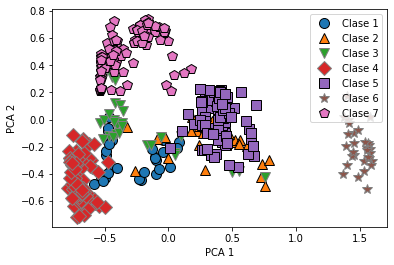

In [7]:
escala = MinMaxScaler()
escala.fit(data)
escalada = escala.transform(data)
pca.fit(escalada)
transformada = pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], classes)
plt.legend(classesName, loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

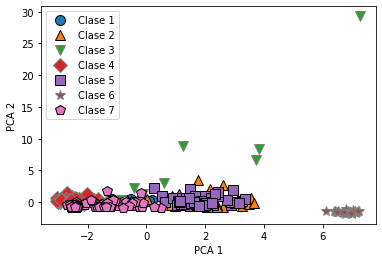

In [8]:
X = data
Y = classesName
datos = preprocessing.scale(X)

pca.fit(datos)
transformada = pca.transform(datos)
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], classes)
plt.legend(Y, loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
pliegues = int(input("Ingresa numero de pliegues para la validación cruzada: "))

In [ ]:
arbol = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(transformada, classes, test_size=0.2, random_state=0)
kf = KFold(n_splits=pliegues)
arbol.fit(X_train, y_train)

In [ ]:
print("ARBOL")
print(" ")
print("Presición de entrenamiento: ", arbol.score(X_test, y_test))
scores = cross_val_score(arbol, X_train, y_train, cv=kf, scoring="accuracy")
print("Media de cross_validation", scores.mean())
predicted = arbol.predict(X_test)
confusion_matrix(y_test, predicted)

In [ ]:
bayes = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(transformada, classes, test_size=0.2, random_state=0)
kf = KFold(n_splits=pliegues)
bayes.fit(X_train, y_train)


In [ ]:
print("BAYES")
print(" ")
print("Presición de entrenamiento: ", bayes.score(X_test, y_test))
scores = cross_val_score(bayes, X_train, y_train, cv=kf, scoring="accuracy")
print("Media de cross_validation", scores.mean())
predicted = bayes.predict(X_test)
confusion_matrix(y_test, predicted)

In [ ]:
sns.set()

In [ ]:
vecinos = int(input("Ingresa el numero de vecinos para el KNN: "))
knn = KNeighborsClassifier(n_neighbors=vecinos, metric='euclidean')
#knn.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(transformada, classes, test_size=0.2, random_state=0)
kf = KFold(n_splits=pliegues)
knn.fit(X_train, y_train)


In [ ]:
#predicted = knn.predict(X_test)

In [ ]:
#confusion_matrix(y_test, predicted)
print("K NEAREST NEIGHBOR")
print(" ")
print("Presición de entrenamiento: ", knn.score(X_test, y_test))
scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring="accuracy")
print("Media de cross_validation", scores.mean())
predicted = knn.predict(X_test)
confusion_matrix(y_test, predicted)

In [ ]:
estimators = [('arbol', arbol), ('Gaussian', bayes), ('KNN', knn)]
ensemble = VotingClassifier(estimators, voting = 'hard')

X_train, X_test, y_train, y_test = train_test_split(transformada, classes, test_size=0.2, random_state=0)
kf = KFold(n_splits=pliegues)
ensemble.fit(X_train, y_train)
print("Presición de entrenamiento: ", ensemble.score(X_test, y_test))
scores = cross_val_score(ensemble, X_train, y_train, cv=kf, scoring="accuracy")
print("Media de cross_validation", scores.mean())

In [ ]:
expected = classes
predicted = ensemble.predict(transformada)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
confusionMat = metrics.confusion_matrix(expected, predicted)

In [ ]:
X = []
Y = []
d = 0.3
for i in range(0,confusionMat.shape[0]):
    for j in range(0,confusionMat.shape[1]):
        for c in range(0, confusionMat[i][j]):
            i_ = float(i)
            j_ = float(j)
            x_ = random.uniform(i_ - d, i_ + d)
            y_ = random.uniform(j_ - d, j_ + d)
            X.append(x_)
            Y.append(y_)
randomColors = np.random.RandomState(0)
colores = randomColors.rand(nLines)

In [ ]:
plt.scatter(X, Y, c = colores)
plt.xlabel("clases reales")
plt.ylabel("clases predecidas")